In [1]:
import pandas as pd

nr = pd.read_excel(r'C:\Users\ebloom\Desktop\Data_Extract_From_Adjusted_Net_Savings.xlsx',
                   usecols=["Country Name", "Country Code", "2017 [YR2017]", "2018 [YR2018]", "2019 [YR2019]"],
                  na_values=["0", ".."])
nr.rename(columns = {"2017 [YR2017]" : "2017", "2018 [YR2018]" : "2018", "2019 [YR2019]" : "2019"}, inplace=True)
nr = nr.round({'2017' : 2, '2018' : 2, '2019' : 2})
nr = nr.drop(nr.index[264:269])
nr = nr.drop(nr.index[0:47])
nr
##Natural resource rents as percent of GDP

,Country Name,Country Code,2017,2018,2019
47,Aruba,ABW,0.00,NaN,NaN
48,Afghanistan,AFG,0.70,0.92,0.77
49,Angola,AGO,16.45,27.43,26.19
50,Albania,ALB,1.36,1.82,1.59
51,Andorra,AND,NaN,NaN,NaN
...,...,...,...,...,...
259,Kosovo,XKX,0.55,0.55,0.40
260,"Yemen, Rep.",YEM,2.00,4.44,5.44
261,South Africa,ZAF,3.64,3.60,3.94
262,Zambia,ZMB,13.30,11.31,6.43


<AxesSubplot:xlabel='2019', ylabel='Country Name'>

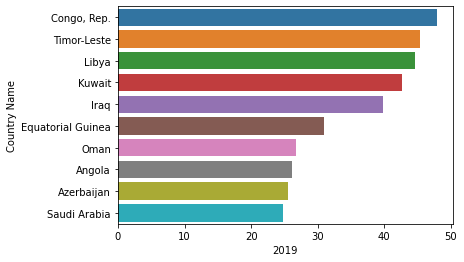

In [2]:
import seaborn as sns

nr = nr.sort_values(by='2019', ascending=False)
top = nr[:10]
sns.barplot(x=top['2019'], y=top['Country Name'])

In [3]:
bottom = nr[-10:]
bottom
##sns.barplot(x=bottom['2019'], y=bottom['Country Name'])

,Country Name,Country Code,2017,2018,2019
221,San Marino,SMR,NaN,NaN,NaN
222,Somalia,SOM,NaN,NaN,NaN
224,South Sudan,SSD,NaN,NaN,NaN
231,Sint Maarten (Dutch part),SXM,NaN,NaN,NaN
233,Syrian Arab Republic,SYR,NaN,NaN,NaN
239,Turkmenistan,TKM,16.55,24.07,NaN
245,Tuvalu,TUV,NaN,NaN,NaN
253,"Venezuela, RB",VEN,NaN,NaN,NaN
254,British Virgin Islands,VGB,NaN,NaN,NaN
255,Virgin Islands (U.S.),VIR,NaN,NaN,NaN


In [4]:
print(nr.describe())

             2017        2018        2019
count  181.000000  180.000000  175.000000
mean     5.902320    6.392444    5.115257
std      8.467102   10.691805    9.086032
min      0.000000    0.000000    0.000000
25%      0.410000    0.392500    0.315000
50%      1.750000    1.725000    1.520000
75%      7.760000    6.840000    5.170000
max     45.170000   73.250000   47.870000


<AxesSubplot:>

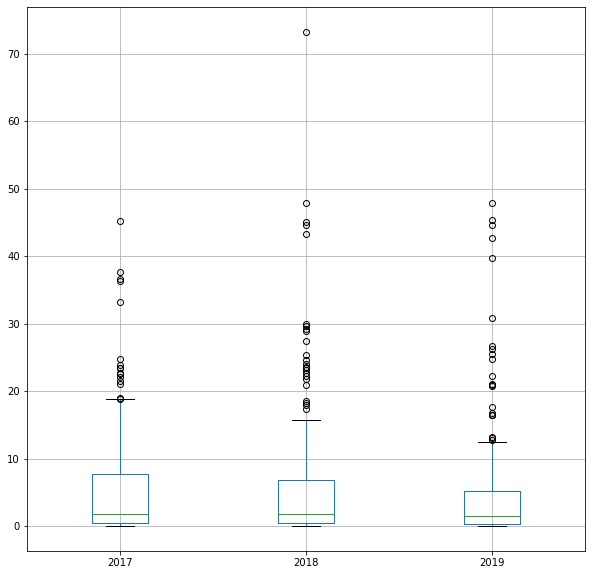

In [5]:
nr.boxplot(figsize=(10,10))

array([[<AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>],
       [<AxesSubplot:title={'center':'2019'}>, <AxesSubplot:>]],
      dtype=object)

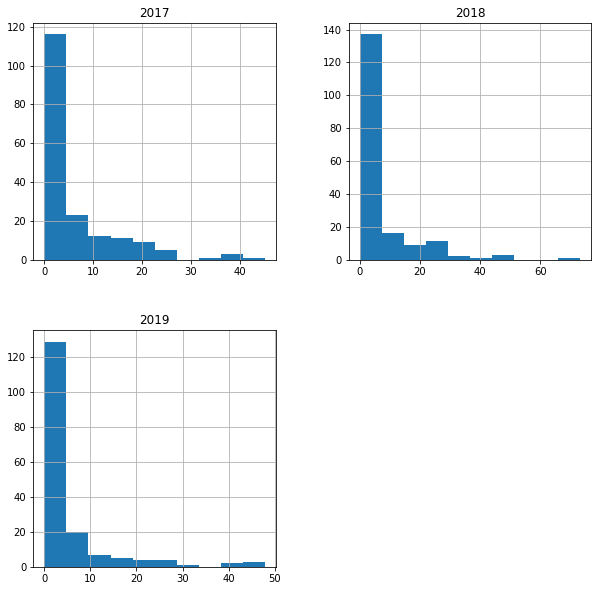

In [6]:
nr.hist(figsize=(10,10))

# GRO data import

In [7]:
GRO = pd.read_excel('https://recovery.smithschool.ox.ac.uk/wp-content/uploads/2021/05/20210524-Global-Recovery-Observatory-publicv2.xlsx', sheet_name="COVID-19 Measures",
                  na_values=[".."], usecols={'Country', 'Total Value, USD (billions)', 'Clean archetype?', 'Recovery?'})
index = GRO[GRO['Recovery?'] != 1].index
rec = GRO.drop(index, inplace=False)
rec = rec.groupby(["Country"], as_index=False).sum()
rec = rec.drop(columns=['Recovery?', 'Clean archetype?'])

index2 = GRO[GRO['Clean archetype?'] != 1].index
greenrec = GRO.drop(index2, inplace=False)
index = greenrec[greenrec['Recovery?'] != 1].index
greenrec.drop(index, inplace=True)
greenrec = greenrec.groupby(["Country"], as_index=False).sum()
greenrec = greenrec.drop(columns=['Recovery?', 'Clean archetype?'])

In [8]:
merge = greenrec.merge(rec, how='left', left_on='Country', right_on='Country')
merge['Percent'] = (merge['Total Value, USD (billions)_x'] / merge['Total Value, USD (billions)_y']) * 100
merge.rename(columns = {"Total Value, USD (billions)_x" : "Green recovery spending", "Total Value, USD (billions)_y" : "Recovery spending"}, inplace=True)
merge = merge.round({"Percent" : 2})
merge

,Country,Green recovery spending,Recovery spending,Percent
0,Argentina,0.00,6.82,0.00
1,Australia,2.30,130.95,1.76
2,Austria,0.38,1.60,23.75
3,Bangladesh,0.55,0.63,87.30
4,Brazil,0.28,0.54,51.85
5,Burkina Faso,0.00,0.00,NaN
6,Canada,21.67,38.70,55.99
7,Chile,0.45,3.13,14.38
8,China,51.88,427.52,12.14
9,Colombia,0.15,0.32,46.88


In [9]:
nr.loc[nr['Country Code'] == 'KOR']
nr.at[152, 'Country Name'] = "South Korea"

In [10]:
GROmerge = merge.merge(nr, how='left', left_on='Country', right_on='Country Name')
GROmerge

,Country,Green recovery spending,Recovery spending,Percent,Country Name,Country Code,2017,2018,2019
0,Argentina,0.00,6.82,0.00,Argentina,ARG,1.13,2.13,2.07
1,Australia,2.30,130.95,1.76,Australia,AUS,5.06,5.48,5.36
2,Austria,0.38,1.60,23.75,Austria,AUT,0.13,0.16,0.13
3,Bangladesh,0.55,0.63,87.30,Bangladesh,BGD,0.58,0.60,0.45
4,Brazil,0.28,0.54,51.85,Brazil,BRA,2.86,3.81,3.47
5,Burkina Faso,0.00,0.00,NaN,Burkina Faso,BFA,12.39,8.46,4.19
6,Canada,21.67,38.70,55.99,Canada,CAN,1.27,2.12,1.90
7,Chile,0.45,3.13,14.38,Chile,CHL,5.32,5.79,2.30
8,China,51.88,427.52,12.14,China,CHN,1.33,1.47,1.26
9,Colombia,0.15,0.32,46.88,Colombia,COL,3.85,5.02,4.52


array([[<AxesSubplot:xlabel='Green recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2017', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2018', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2019', ylabel='Green recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2017', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2018', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2019', ylabel='Recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Percent'>,
        <AxesSubplot:xlabel='Recovery 

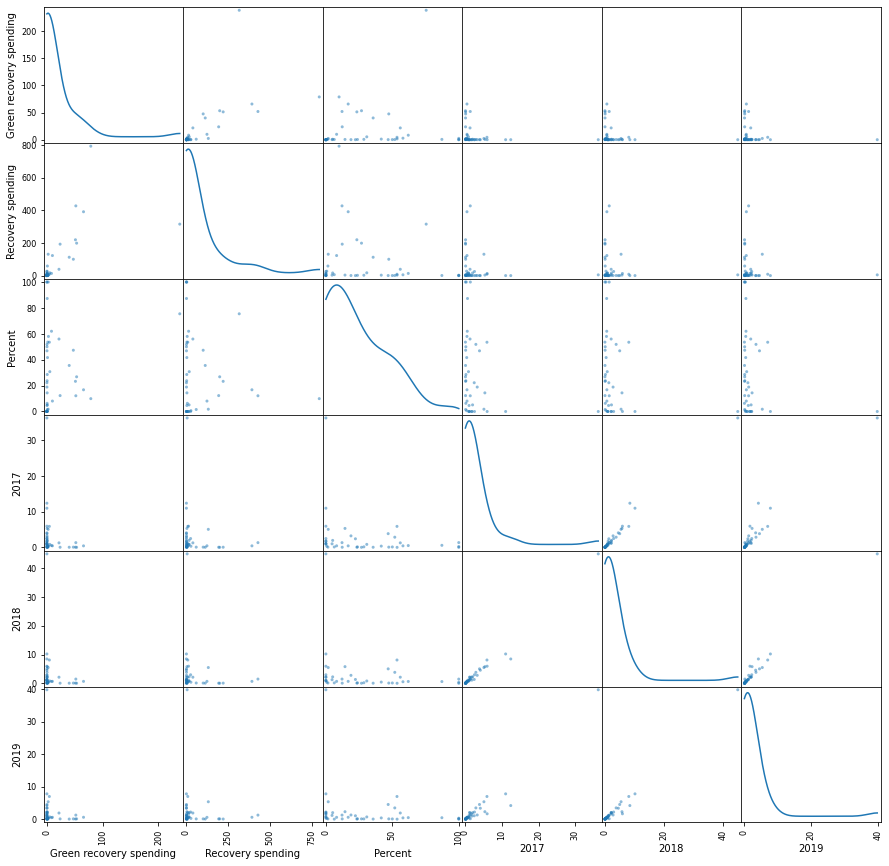

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(GROmerge, alpha=0.5, diagonal='kde', figsize=(15,15))

In [12]:
corr = GROmerge.corr(method='pearson')
corr

,Green recovery spending,Recovery spending,Percent,2017,2018,2019
Green recovery spending,1.000000,0.651449,0.172324,-0.189963,-0.169291,-0.146128
Recovery spending,0.651449,1.000000,-0.121912,-0.151857,-0.135635,-0.112388
Percent,0.172324,-0.121912,1.000000,-0.230725,-0.205458,-0.191352
2017,-0.189963,-0.151857,-0.230725,1.000000,0.986118,0.960796
2018,-0.169291,-0.135635,-0.205458,0.986118,1.000000,0.990111
2019,-0.146128,-0.112388,-0.191352,0.960796,0.990111,1.000000


<AxesSubplot:>

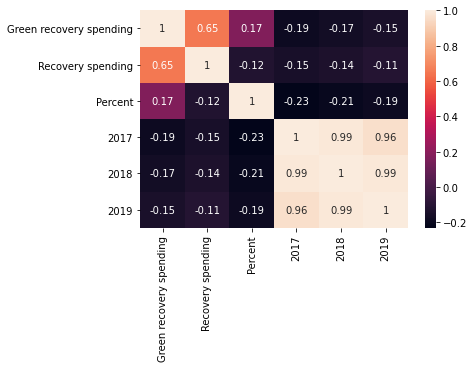

In [13]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [16]:
import plotly.graph_objects as go

hover_text = []
for index, row in GROmerge.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Green recovery spending as % of recovery spending: {percent}<br>'+
                      'Natural resource rents as % of GDP: {nrr}<br>'+
                      'Green recovery spending (USD billions): {grs}<br>').format(country=row['Country'],
                                            percent=row['Percent'],
                                            nrr=row['2019'],
                                            grs=row['Green recovery spending'],
                                            ))
fig = go.Figure(data=[go.Scatter(
    x=GROmerge['Percent'], y=GROmerge['2019'],
    text=hover_text,
    mode='markers',
      marker=dict(
        size=GROmerge['Green recovery spending'])
)
])

fig.update_layout(
    title='Green recovery spending vs Natural resource rents 2019',
    xaxis=dict(
        title='Green recovery spending as % of recovery spending',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Natural resource rents as % of GDP',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

sizeref = 0.1 * max(GROmerge['Green recovery spending']) / (20 ** 2)
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=1, line_color='black'))

fig.show()

##really few points because not scaled - others not visible?
##https://plotly.com/python/bubble-charts/